# Algoritmos de clasificación utilizando el archivo iris

In [60]:
# importar las librerías necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [61]:
# importar el dataset iris y visualización de los primeros datos
dataset=pd.read_csv('Iris.csv')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
# Muestra en pantalla el número de filas y columnas
print(dataset.shape)

(150, 5)


In [63]:
# Más información de los datos, nombre de columna, datos no nulos y tipo de datos que contiene
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [64]:
# Descripción estadística de los datos por columnas
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [65]:
# Distribución de clases
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<AxesSubplot:>

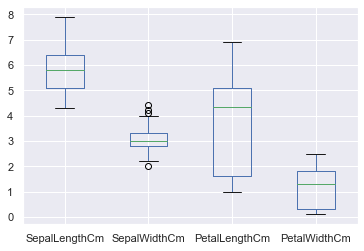

In [66]:
# Graficando el dataset tipo Box
dataset.plot(kind='box',sharex=False,sharey=False)

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

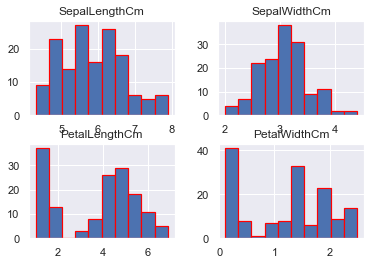

In [67]:
# Histogramas por variable
dataset.hist(edgecolor='red', linewidth=1.2)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

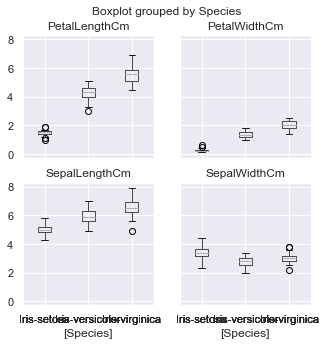

In [68]:
# Gráfico de caja por clase
dataset.boxplot(by='Species', figsize=(5,5))

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

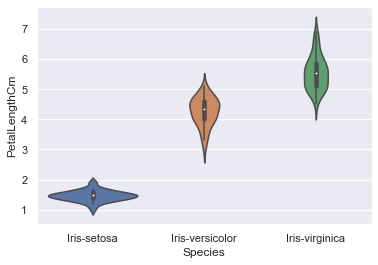

In [69]:
# Gráfico de violín para la longitud de pétalo por cada especie o clase
sns.violinplot(data=dataset,x='Species',y='PetalLengthCm')

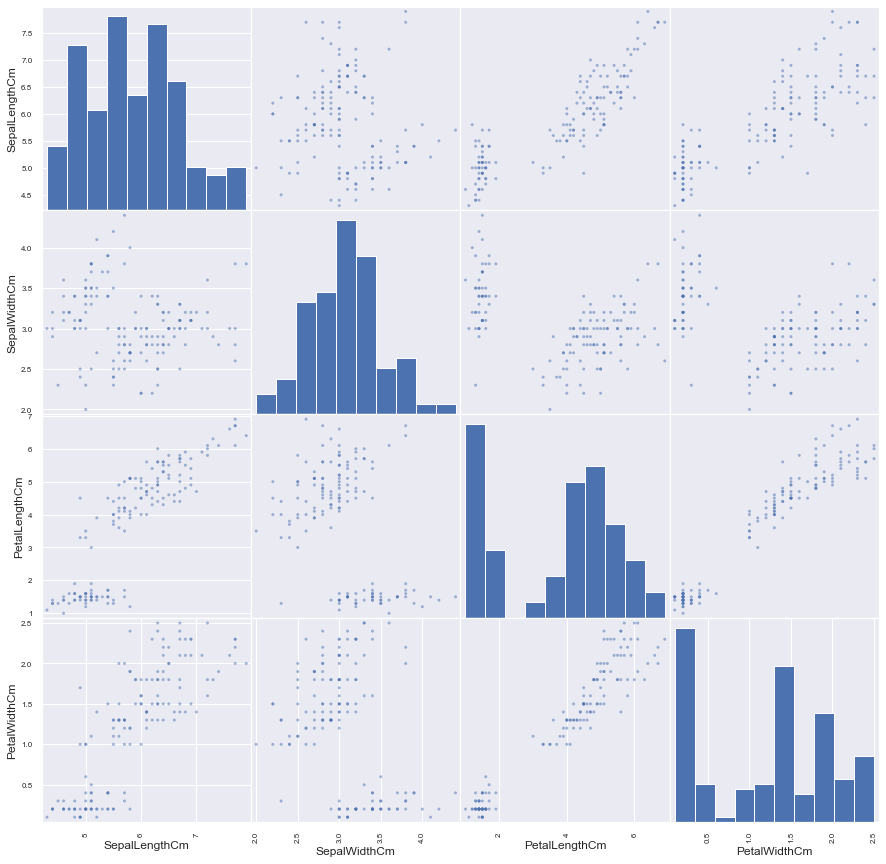

In [70]:
# Matriz de diagramas de dispersión
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(15,15))
plt.show()

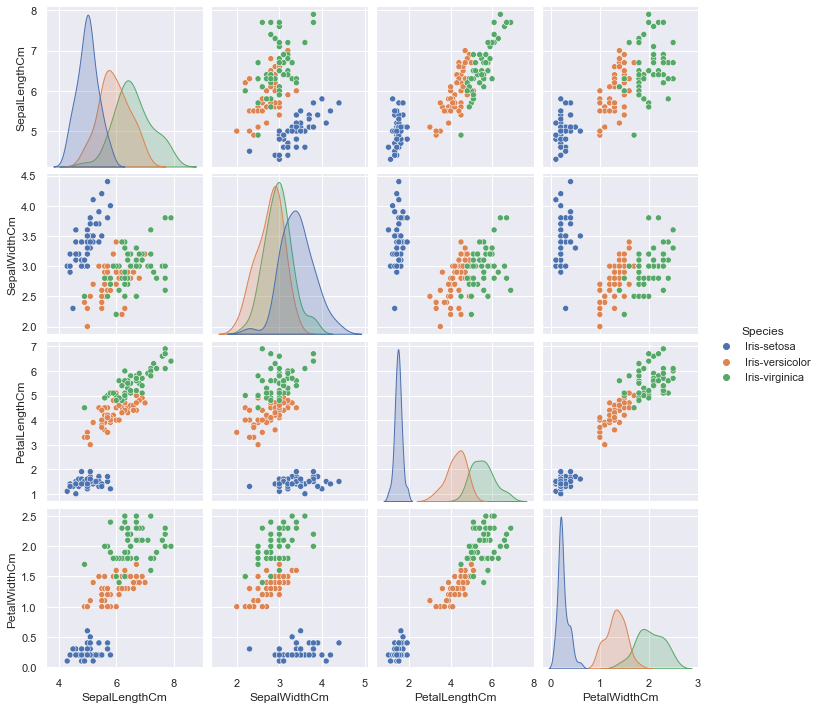

In [71]:
# Uso de la gráfica de par de mar para ver la relación bivariada entre cada par de características
sns.pairplot(dataset,hue='Species')

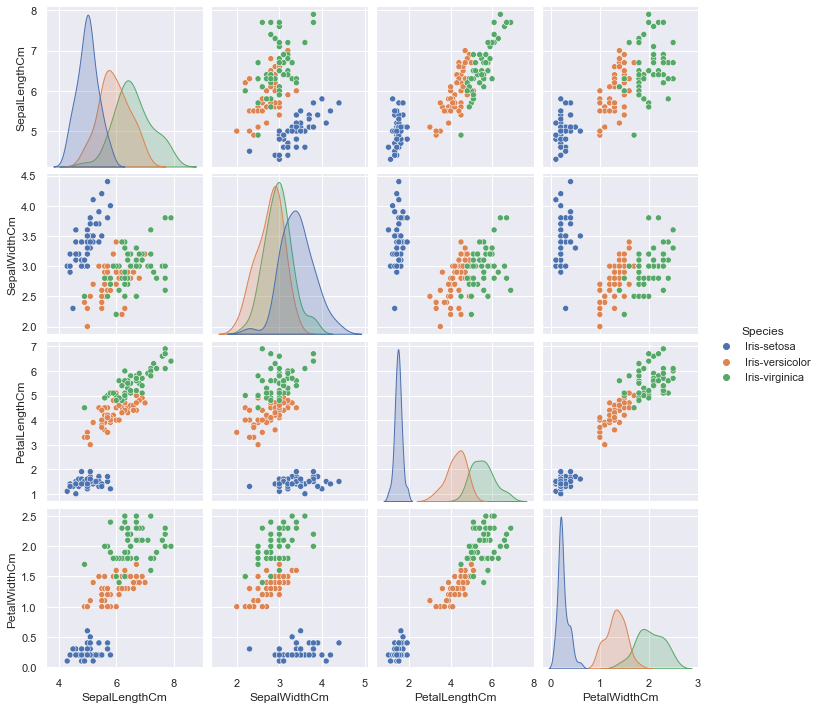

In [72]:
# Actualizando los elementos diagonales en un diagrama de par para mostrar un kde
sns.pairplot(dataset,hue='Species',diag_kind='kde')

# Aplicando diferentes modelos de clasificación

In [73]:
# Importando métricas para evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [74]:
# Separando los datos en variables dependientes e independientes
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Dividiendo el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [80]:
# Modelo de regresión lineal
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Muestra la precisión obtenida
from sklearn.metrics import accuracy_score
print('La precisión es ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
La precisión es  1.0


C:\Users\MAKTUB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# Utilizando Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Mostrando el valor de la precisión
from sklearn.metrics import accuracy_score
print('La precisión es ', accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
La precisión es  0.9666666666666667


In [81]:
# Máquina de vectores de soporte

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC

classifier=SVC()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# Mostrando el valor de la precisión
from sklearn.metrics import accuracy_score
print('La precisión es ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
La precisión es  1.0


In [79]:
# Utilizando K-vecinos cercanos
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

#Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Mostrando el valor de la precisión
from sklearn.metrics import accuracy_score
print('La precisión es ',accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
La precisión es  1.0


In [83]:
# Utilizando árbol de decisión
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Mostrando el valor de la precisión
from sklearn.metrics import accuracy_score
print('La precisión es ', accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
La precisión es  1.0
